<a href="https://colab.research.google.com/github/omkar111999/omkar111999/blob/main/Simple_linear_regression_salary_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv('/content/Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


##Data Cleaning


Dealing with nan values and outliers.



In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

There are no nan values. Now, let's go check for outliers using the z-score metric.



In [8]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Removing outliers from column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [9]:
df = remove_outliers(df, df.columns, 3)

Removing outliers from column: YearsExperience
Removing outliers from column: Salary


checking if the data has changed is shape 


In [11]:
df.shape

(30, 2)

##Data Visualization

Years of Experience



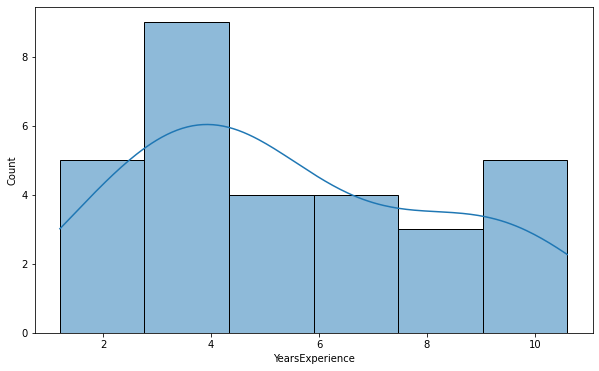

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['YearsExperience'], kde=True)
plt.show()

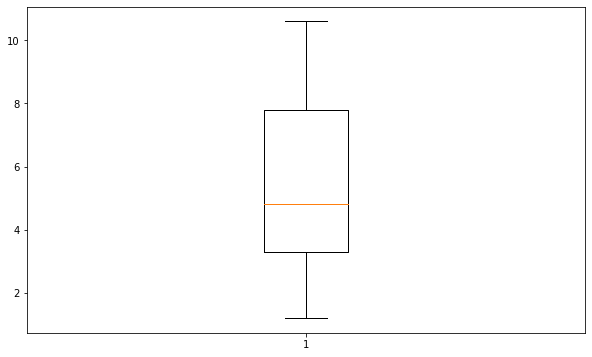

In [22]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['YearsExperience'])
plt.show()

Salary graph

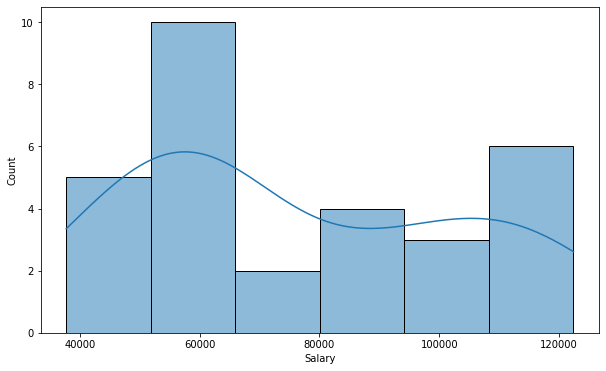

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True)
plt.show()

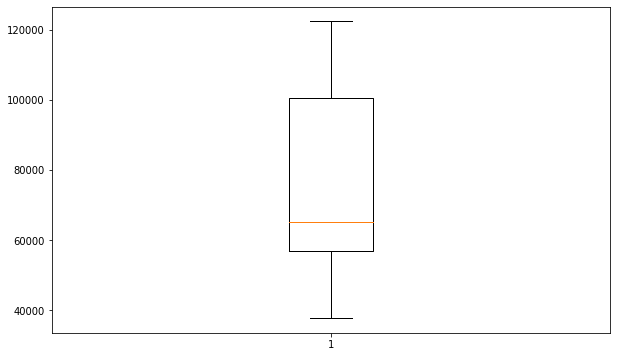

In [21]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Salary'])
plt.show()

##Data Preparation

We need to select the feature to predict (the salary) and the feature(s) to train the model on (here the years of experience).

In [25]:
X = df['YearsExperience'].to_numpy().reshape(-1, 1)
y = df['Salary']

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (12, 1), (18,), (12,))

##Building Models

In this section, we will use several different regression models.

liner regression 


In [29]:
predictions = {}

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
predictions['linear_regression'] = yhat

##Logistic Regression¶


In [31]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
yhat = logistic_regression.predict(X_test)
predictions['logistic_regression'] = yhat

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Ridge

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
yhat = ridge.predict(X_test)
predictions['ridge'] = yhat

##Lasso

In [33]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
yhat = lasso.predict(X_test)
predictions['lasso'] = yhat

##Evaluating Models¶


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
for model_name, preds in predictions.items():
    print(f"\t=== {model_name} ===")
    print(f"> MSE : {mean_squared_error(y_test, preds)}")
    print(f"> MAE : {mean_absolute_error(y_test, preds)}")
    print(f"> R2 score : {r2_score(y_test, preds)}")
    print()

	=== linear_regression ===
> MSE : 37867393.388939455
> MAE : 5349.257075540302
> R2 score : 0.9532338376280692

	=== logistic_regression ===
> MSE : 39873854.833333336
> MAE : 5748.166666666667
> R2 score : 0.9507558613718807

	=== ridge ===
> MSE : 38343454.18851836
> MAE : 5382.882663169082
> R2 score : 0.9526459034012967

	=== lasso ===
> MSE : 37868245.66161563
> MAE : 5349.223915762533
> R2 score : 0.953232785072855



Based on these evaluations, it seems that the classic Linear Regression is the most suited model to achieve a reasonably good performance on this dataset. All models are equal except the Logistic Regression.

It is important to note that the test size matters a lot here. By default, I set it to 0.2 but setting it to 0.4 increase performance (r2 score) from 90% to 95%.

##Conclusion

I tried to perform several regressions with different models to have an idea about the efficiency of those.

